<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/association_chipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Chipotle Mexican Grill, 줄여서 Chipotle(치폴레)는 멕시코 요리를 주로 제공하는 미국의 패스트 캐주얼 레스토랑 체인입니다. 1993년에 스티브 엘스(Steve Ells)에 의해 콜로라도주 덴버에서 처음 설립되었습니다. 현재 전 세계적으로 수천 개의 지점을 운영하고 있으며, 주로 미국, 캐나다, 영국, 프랑스, 독일 등에서 볼 수 있습니다.

주요 특징
* 메뉴: Chipotle은 간단하지만 맞춤화 가능한 메뉴를 제공합니다. 주로 타코, 부리토, 보울, 샐러드 등이 있으며, 고객은 원하는 재료를 선택해 자신만의 음식을 만들 수 있습니다. 각 재료는 신선함을 강조하며, 다양한 고기, 쌀, 콩, 야채, 소스 등을 선택할 수 있습니다.

* 품질 강조: Chipotle은 고품질의 재료를 사용하고, 지속 가능한 농업과 자연친화적인 식재료 공급망을 구축하는 데 중점을 둡니다. "Food with Integrity"라는 슬로건 아래, 유기농 재료, 항생제 없이 기른 고기, 로컬 농산물 사용을 추구합니다.

* 사업 전략: Chipotle은 패스트푸드와 달리 패스트 캐주얼(Fast Casual)로 분류되며, 비교적 빠르고 편리하게 고품질의 음식을 제공하는 것을 목표로 합니다. 또한, 매장 디자인부터 서비스 방식까지 모든 면에서 단순하면서도 효율적인 운영을 추구합니다.

* 성장과 도전: Chipotle은 설립 이후 빠르게 성장했지만, 중간에 몇 가지 도전 과제도 있었습니다. 특히 2015년에는 식중독 사태가 발생해 큰 타격을 입었고, 이후 위생과 안전에 대한 엄격한 조치를 도입해 신뢰 회복에 힘썼습니다.

* 디지털 전환: 최근 몇 년 동안, Chipotle은 온라인 주문 및 배달 서비스를 크게 확대하며 디지털 트랜스포메이션에 집중하고 있습니다. 이를 통해 팬데믹 기간 동안에도 지속적인 성장을 이룰 수 있었습니다.

In [48]:
## 연관규칙 학습
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def p(str):
    print(str, '\n')

In [49]:
# 데이터 프레임

df = pd.read_csv('/content/chipotle.csv')
p(df.head)
df.info()


<bound method NDFrame.head of       order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                          

In [50]:
# chipotle.csv 데이터 구성
'''
order_id : 주문번호
quantity : 수량
item_name : 아이템명
choice_description : 선택옵션
item_price : 아이템 가격
'''
p(df.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object') 



In [51]:
# 연관분석 함수를 사용하기 위해 리스트로 변환하여 아이템 셋들을 생성
df_temp = df[['order_id', 'item_name']]
# p(df_temp)

In [52]:
df_temp_arr = [[]for i in range(1835)]
p(df_temp_arr)


[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [53]:
num = 0
for i in df_temp['item_name']:
    df_temp_arr[df_temp['order_id'][num]].append(i)
    num += 1
p(df_temp_arr)

[[], ['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa'], ['Chicken Bowl'], ['Chicken Bowl', 'Side of Chips'], ['Steak Burrito', 'Steak Soft Tacos'], ['Steak Burrito', 'Chips and Guacamole'], ['Chicken Crispy Tacos', 'Chicken Soft Tacos'], ['Chicken Bowl', 'Chips and Guacamole'], ['Chips and Tomatillo-Green Chili Salsa', 'Chicken Burrito'], ['Chicken Burrito', 'Canned Soda'], ['Chicken Bowl', 'Chips and Guacamole'], ['Barbacoa Burrito', 'Nantucket Nectar'], ['Chicken Burrito', 'Izze'], ['Chips and Fresh Tomato Salsa', 'Chicken Bowl'], ['Carnitas Burrito', 'Canned Soda'], ['Chicken Burrito', 'Chips and Tomatillo-Green Chili Salsa'], ['Steak Burrito', 'Side of Chips'], ['Carnitas Bowl', 'Bottled Water'], ['Chicken Soft Tacos', 'Chicken Soft Tacos', 'Chips and Guacamole', 'Chips and Tomatillo Green Chili Salsa'], ['Barbacoa Bowl', 'Chips'], ['Chips and Guacamole', 'Chicken Bowl', 'Steak Burrito', 'Chicken Salad Bowl'], ['Chicken Burrito', 

In [54]:
# order_id 는 1부터 시작하므로 빈값 제거
df_temp_arr.pop(0)
p(df_temp_arr)

[['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa'], ['Chicken Bowl'], ['Chicken Bowl', 'Side of Chips'], ['Steak Burrito', 'Steak Soft Tacos'], ['Steak Burrito', 'Chips and Guacamole'], ['Chicken Crispy Tacos', 'Chicken Soft Tacos'], ['Chicken Bowl', 'Chips and Guacamole'], ['Chips and Tomatillo-Green Chili Salsa', 'Chicken Burrito'], ['Chicken Burrito', 'Canned Soda'], ['Chicken Bowl', 'Chips and Guacamole'], ['Barbacoa Burrito', 'Nantucket Nectar'], ['Chicken Burrito', 'Izze'], ['Chips and Fresh Tomato Salsa', 'Chicken Bowl'], ['Carnitas Burrito', 'Canned Soda'], ['Chicken Burrito', 'Chips and Tomatillo-Green Chili Salsa'], ['Steak Burrito', 'Side of Chips'], ['Carnitas Bowl', 'Bottled Water'], ['Chicken Soft Tacos', 'Chicken Soft Tacos', 'Chips and Guacamole', 'Chips and Tomatillo Green Chili Salsa'], ['Barbacoa Bowl', 'Chips'], ['Chips and Guacamole', 'Chicken Bowl', 'Steak Burrito', 'Chicken Salad Bowl'], ['Chicken Burrito', 'Ste

In [55]:
# set으로 중복값을 제거 후 list로 반환
num = 0
for i in df_temp_arr:
    df_temp_arr[num] = list(set(df_temp_arr[num]))
    num += 1

In [56]:
# unique한 아이템 명
p(df['item_name'].unique())

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

In [57]:
# 트랜잭션 인코더 생성
te = TransactionEncoder()

In [58]:
# 학습시키고 변환
te_arr = te.fit(df_temp_arr).transform(df_temp_arr)
te_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [59]:
# 변환된 이진행렬을 데이터 프레임을 변환 후
# 각 열의 이름을 아이템명으로 설정
df1 = pd.DataFrame(te_arr, columns=te.columns_)
p(df1)

      6 Pack Soft Drink  Barbacoa Bowl  Barbacoa Burrito  \
0                 False          False             False   
1                 False          False             False   
2                 False          False             False   
3                 False          False             False   
4                 False          False             False   
...                 ...            ...               ...   
1829              False          False             False   
1830              False          False             False   
1831              False          False             False   
1832              False          False             False   
1833              False          False             False   

      Barbacoa Crispy Tacos  Barbacoa Salad Bowl  Barbacoa Soft Tacos  \
0                     False                False                False   
1                     False                False                False   
2                     False                False            

In [60]:
# 정규표현식 라이브러리
import re

# 경고무시
import warnings
warnings.filterwarnings(action='ignore')

In [61]:
# 아이템 가격의 $ 문자 제거 방법 1)정규표현식
num = 0
for i in df['item_price']:
    df['item_price'][num] = re.sub(pattern = '[$]',repl = '', string=i)
    num += 1
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [62]:
# 아이템 가격의 $ 문자 제거 방법 2)lambda 함수 사용
df['item_price'] = df['item_price'].apply(lambda x:x.lstrip('$'))
p(df)
df['item_price'].sum()

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN      2.39   
1                                          [Clementine]  

'2.39 3.39 3.39 2.39 16.98 10.98 1.69 11.75 9.25 9.25 4.45 8.75 8.75 11.25 4.45 2.39 8.49 8.49 2.18 8.75 4.45 8.99 3.39 10.98 3.39 2.39 8.49 8.99 1.09 8.49 2.39 8.99 1.69 8.99 1.09 8.75 8.75 4.45 2.95 11.75 2.15 4.45 11.25 11.75 8.75 10.98 8.99 3.39 8.99 3.99 8.99 2.18 10.98 1.09 8.99 2.39 9.25 11.25 11.75 2.15 4.45 9.25 11.25 8.75 8.99 8.99 3.39 8.99 10.98 8.99 1.69 8.99 3.99 8.75 4.45 8.75 8.75 2.15 8.75 11.25 2.15 9.25 8.75 8.75 9.25 8.49 8.99 1.09 9.25 2.95 11.75 11.75 9.25 11.75 4.45 9.25 4.45 11.75 8.75 8.75 4.45 8.99 8.99 3.99 8.49 3.39 8.99 1.09 9.25 4.45 8.75 2.95 4.45 2.39 8.49 8.99 8.49 1.09 8.99 3.99 8.75 9.25 4.45 11.25 4.45 8.99 1.09 9.25 2.95 4.45 11.75 4.45 8.49 2.39 10.98 22.50 11.75 4.45 11.25 4.45 11.25 4.45 11.25 11.25 11.75 9.25 4.45 11.48 17.98 1.69 17.50 4.45 8.49 2.39 17.50 4.45 4.45 11.25 11.75 10.98 8.49 10.98 2.18 11.48 8.49 2.39 4.45 11.25 11.75 8.75 8.49 2.18 8.49 3.39 8.49 8.99 10.98 11.48 8.49 1.09 1.09 9.25 8.75 2.95 9.25 4.45 11.25 11.48 8.49 8.49 8.99 

In [63]:
## null 인 것들을 'default' 로  채움
df['choice_description'] = df['choice_description'].fillna('default')
df.isnull().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,0
item_price,0


In [64]:
# 알파벳과 쉼표를 제외한 모든 문자 제거
num = 0
for i in df['choice_description']:
    df['choice_description'][num] \
    = re.sub(pattern = '[^a-zA-Z,]',repl = '', string=i)
    num += 1
df['choice_description']

,choice_description
0,default
1,Clementine
2,Apple
3,default
4,"TomatilloRedChiliSalsaHot,BlackBeans,Rice,Chee..."
...,...
4617,"FreshTomatoSalsa,Rice,BlackBeans,SourCream,Che..."
4618,"FreshTomatoSalsa,Rice,SourCream,Cheese,Lettuce..."
4619,"FreshTomatoSalsa,FajitaVegetables,PintoBeans,G..."
4620,"FreshTomatoSalsa,FajitaVegetables,Lettuce"


In [65]:
# import re ## 정규표현식 방식

# df['choice_description'] = df['choice_description'].apply(lambda x: re.sub(r'[^a-zA-Z,]', '', x))
# print(df['choice_description'])

In [66]:
# 아이템 명 과 선택옵션의 값의 수를 시리즈로
result = df.groupby(['item_name', 'choice_description']).value_counts()
result

item_name          choice_description                                                                order_id  quantity  item_price
6 Pack Soft Drink  Coke                                                                              154       1         6.49          1
                                                                                                     776       1         6.49          1
                                                                                                     1443      1         6.49          1
                                                                                                     1373      1         6.49          1
                                                                                                     1076      1         6.49          1
                                                                                                                                      ..
Veggie Soft Tacos  FreshTomatoSalsaMild,BlackBeans,Rice,Cheese,Lettuce                               1559      2         16.98         1
                   FreshTomatoSalsaMild,PintoBeans,Rice,Cheese,SourCream                             567       1         8.49          1
                   RoastedChiliCornSalsa,FajitaVegetables,BlackBeans,PintoBeans,Cheese,Lettuce       948       1         8.75          1
                   RoastedChiliCornSalsaMedium,BlackBeans,FajitaVeggies,Cheese,SourCream,Lettuce     1132      1         8.49          1
                   TomatilloRedChiliSalsa,FajitaVegetables,Rice,BlackBeans,Cheese,Guacamole,Lettuce  304       1         11.25         1
Name: count, Length: 4563, dtype: int64

In [67]:
# 시리즈의 인덱스로 리스트 변환
temp_index = result.index.tolist()
p(temp_index)

[('6 Pack Soft Drink', 'Coke', 154, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 776, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 1443, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 1373, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 1076, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 949, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 899, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 849, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 749, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 708, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 511, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 481, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 465, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 432, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 363, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 1454, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 1508, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 1537, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 1666, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 1741, 1, '6.49 '), ('6 Pack Soft Drink', 'Coke', 3

In [68]:
# 시리즈의 값들을 리스트 변환
temp_values = result.values.tolist()
p(temp_values)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

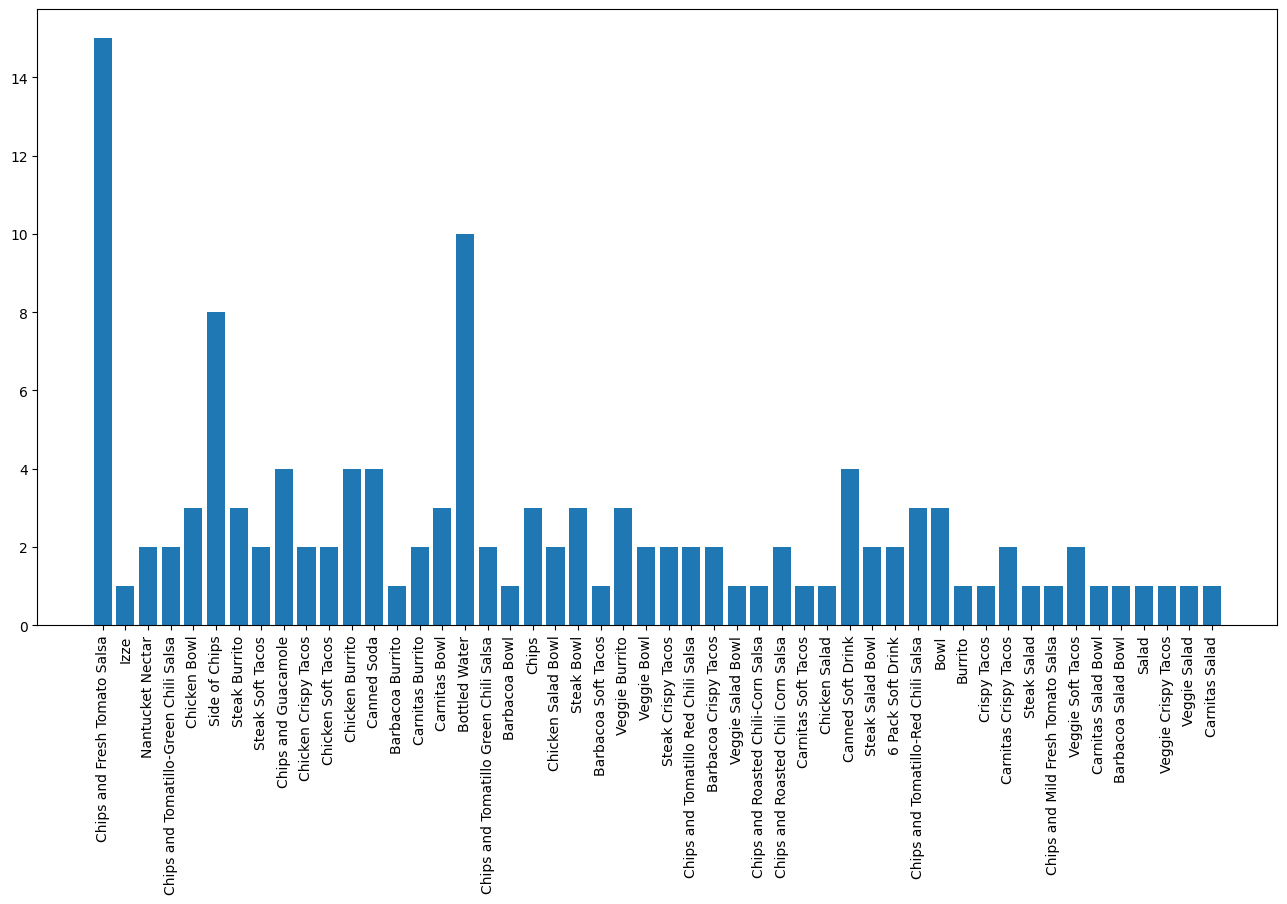

In [69]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
x = df['item_name']
y = df['quantity']
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
# 중복된 아이템 제거하고 판매량 합계 계산
df.groupby('item_name')['quantity'].sum()

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [71]:
# 가장 많이 팔린 메뉴 중 10개 막대그래프
top_items \
  = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)
top_items

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


In [72]:
# nlargest 함수(가장 큰 값을 가지는 아이템 추출) 사용해서 상위 10개 아이템 추출
top_itmes = df.groupby('item_name')['quantity'].sum().nlargest(10)
top_items

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


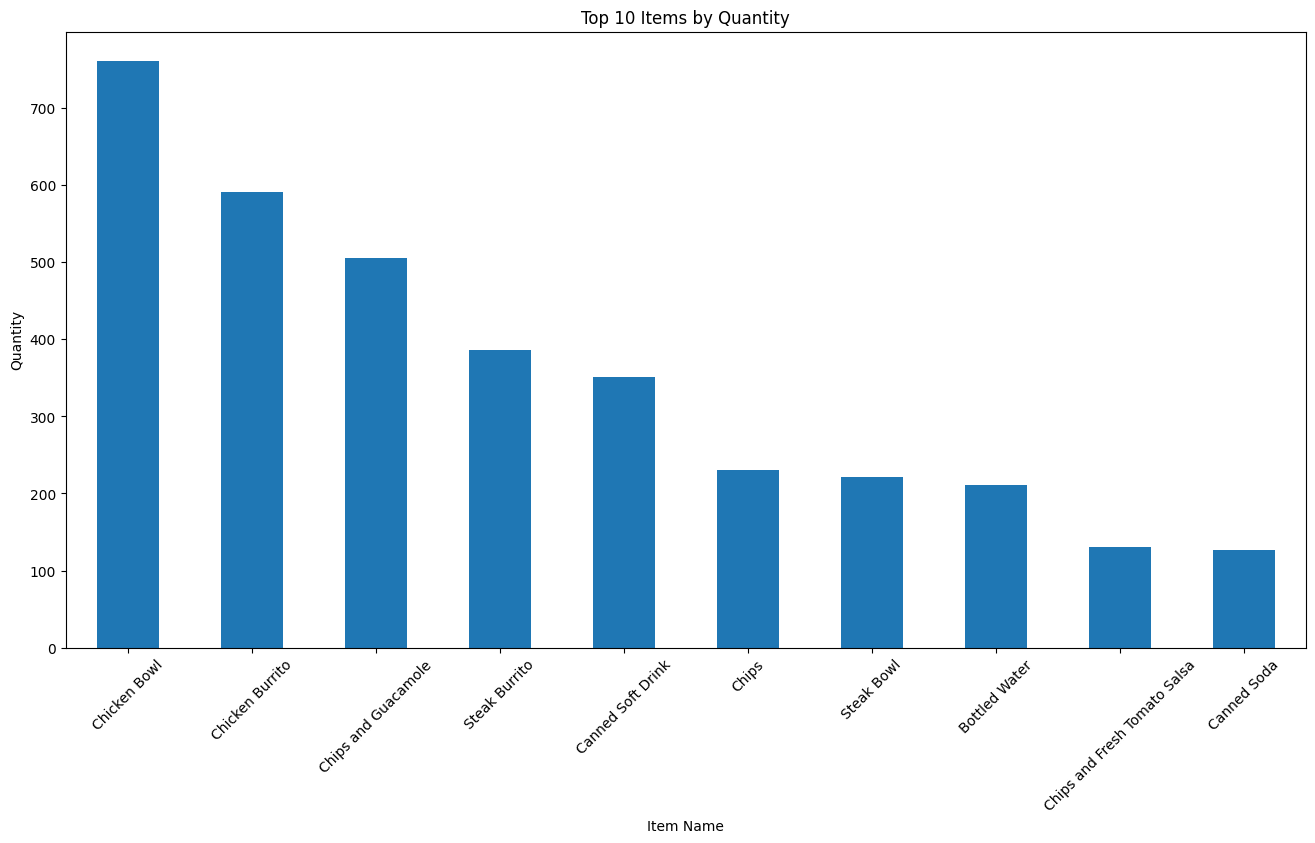

In [73]:
plt.figure(figsize=(16, 8))
top_items.plot(kind='bar')
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.title('Top 10 Items by Quantity')
plt.xticks(rotation=45)
plt.show()

In [74]:
# 연관학습 라이브러리
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [75]:
# 그룹핑 후 확인
# unstack : 인덱스 값을 컬럼으로 사용
df_grouped = df.groupby(['order_id', 'item_name'])['quantity']\
              .sum().unstack().reset_index()
df_grouped

item_name,order_id,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1830,1831,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1831,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# 판매량이 1 이상인 경우 1로 변경
df_group = df_grouped.applymap(lambda x: 1 if x >= 1 else 0)
df_group

item_name,order_id,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1830,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1831,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1832,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# apriori 알고리즘을 사용해 연관규칙 학습
frequent = apriori(
    df_group.drop('order_id', axis=1), #데이터 프레임
    min_support=0.01, # 최소 지지도
    use_colnames=True # 컬럼명 사용여부
)

# 연관규칙 추출
# lift : 향상도(규칙이 얼마나 의미있는지)
rules = association_rules(
    frequent,
    metric='lift', # 향상도를 기준으로
    min_threshold=1.0
)


In [80]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         52 non-null     object 
 1   consequents         52 non-null     object 
 2   antecedent support  52 non-null     float64
 3   consequent support  52 non-null     float64
 4   support             52 non-null     float64
 5   confidence          52 non-null     float64
 6   lift                52 non-null     float64
 7   leverage            52 non-null     float64
 8   conviction          52 non-null     float64
 9   zhangs_metric       52 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.2+ KB


In [82]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Chicken Burrito),(6 Pack Soft Drink),0.266630,0.029444,0.010360,0.038855,1.319624,0.002509,1.009791,0.330268
1,(6 Pack Soft Drink),(Chicken Burrito),0.029444,0.266630,0.010360,0.351852,1.319624,0.002509,1.131485,0.249556
2,(Chips and Guacamole),(6 Pack Soft Drink),0.258451,0.029444,0.011450,0.044304,1.504688,0.003841,1.015549,0.452311
3,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443,0.345586
4,(Chicken Bowl),(Bottled Water),0.335333,0.083969,0.037623,0.112195,1.336142,0.009465,1.031793,0.378500
5,(Bottled Water),(Chicken Bowl),0.083969,0.335333,0.037623,0.448052,1.336142,0.009465,1.204221,0.274638
6,(Chips),(Bottled Water),0.113413,0.083969,0.019084,0.168269,2.003934,0.009561,1.101355,0.565068
7,(Bottled Water),(Chips),0.083969,0.113413,0.019084,0.227273,2.003934,0.009561,1.147347,0.546905
8,(Bottled Water),(Steak Bowl),0.083969,0.102508,0.014177,0.168831,1.647002,0.005569,1.079795,0.428846
9,(Steak Bowl),(Bottled Water),0.102508,0.083969,0.014177,0.138298,1.647002,0.005569,1.063048,0.437704


In [83]:
# 연관학습 결과
rules['support']

,support
0,0.010360
1,0.010360
2,0.011450
3,0.011450
4,0.037623
5,0.037623
6,0.019084
7,0.019084
8,0.014177
9,0.014177


In [84]:
rules['confidence']

,confidence
0,0.038855
1,0.351852
2,0.044304
3,0.388889
4,0.112195
5,0.448052
6,0.168269
7,0.227273
8,0.168831
9,0.138298


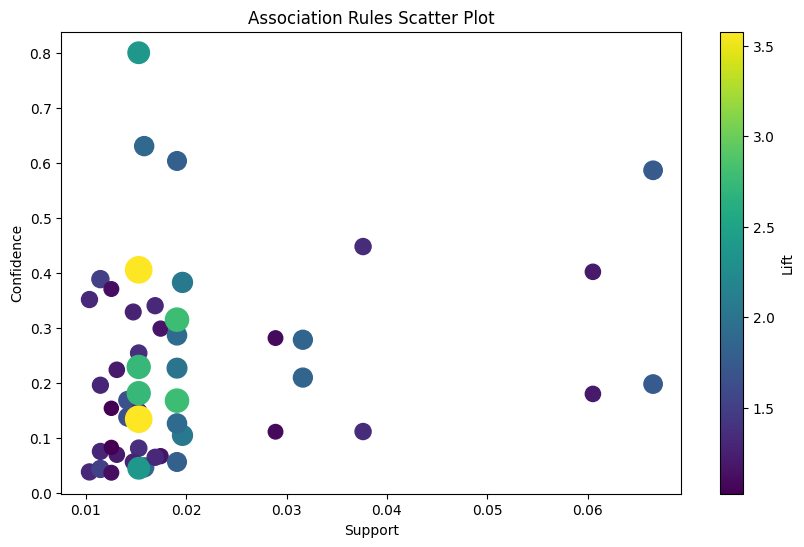

In [87]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*100, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Scatter Plot')
plt.show()

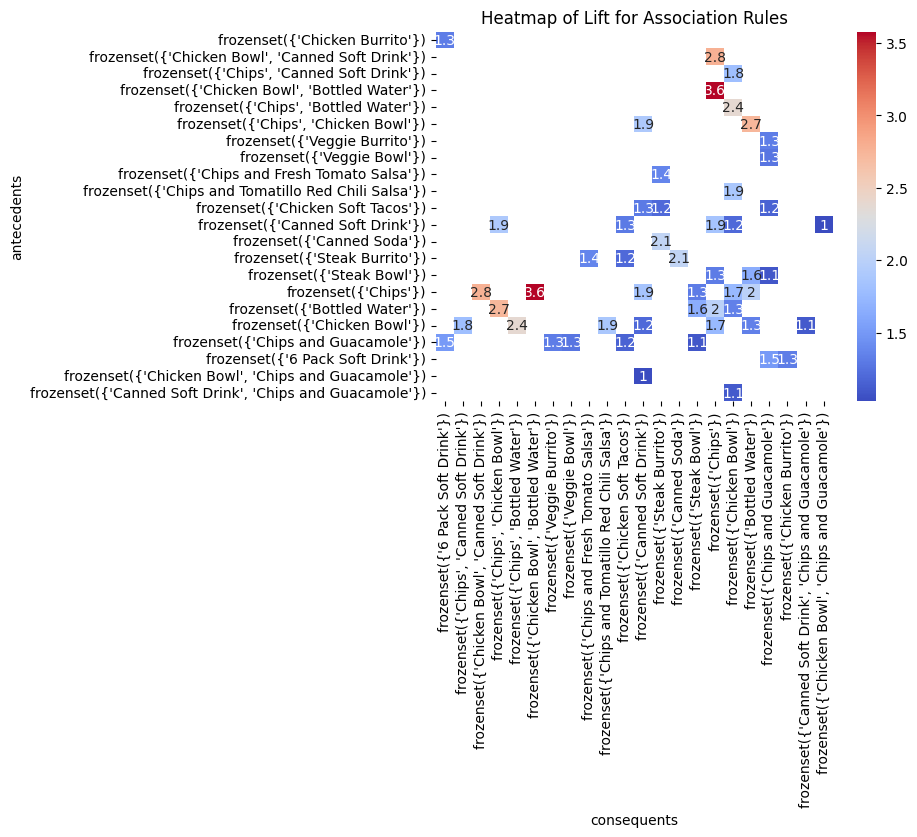

In [88]:
import seaborn as sns

pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Heatmap of Lift for Association Rules')
plt.show()


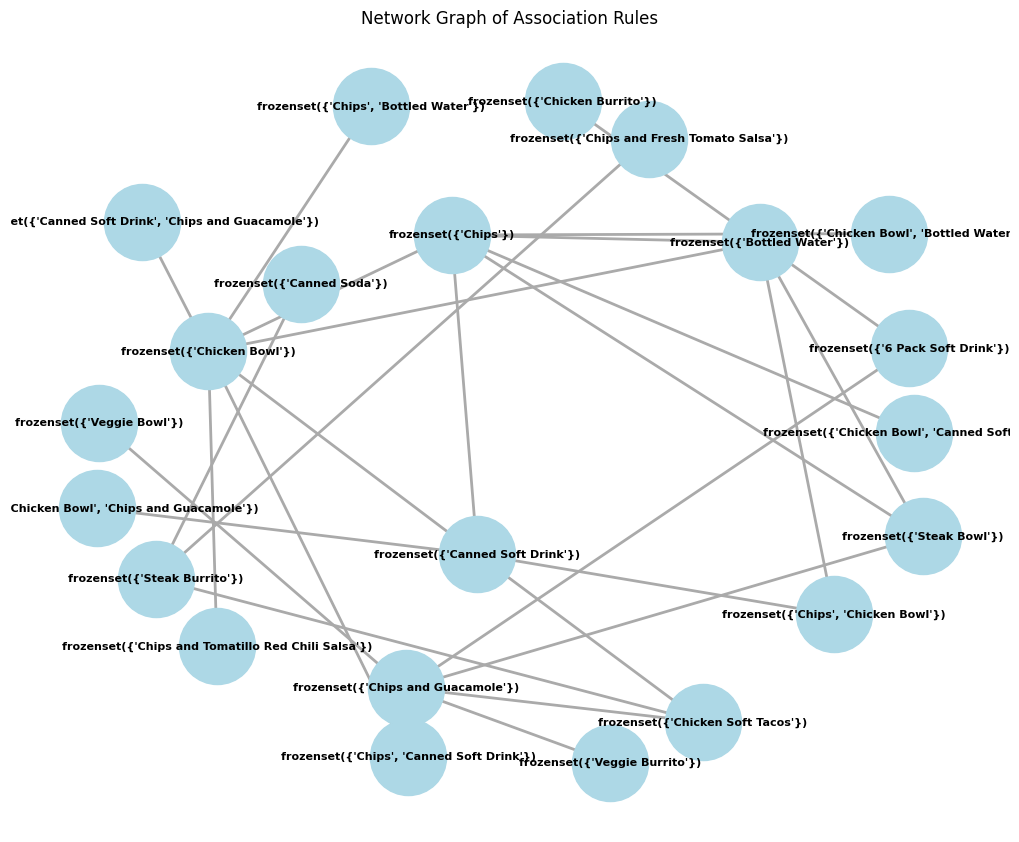

In [93]:
import networkx as nx

G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['lift'])
pos = nx.spring_layout(G, k=2, seed=42)
edges, weights = zip(*nx.get_edge_attributes(G, 'lift').items())
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=8, font_weight='bold', edge_color='#AAAAAA', width=2)
plt.title('Network Graph of Association Rules')
plt.show()


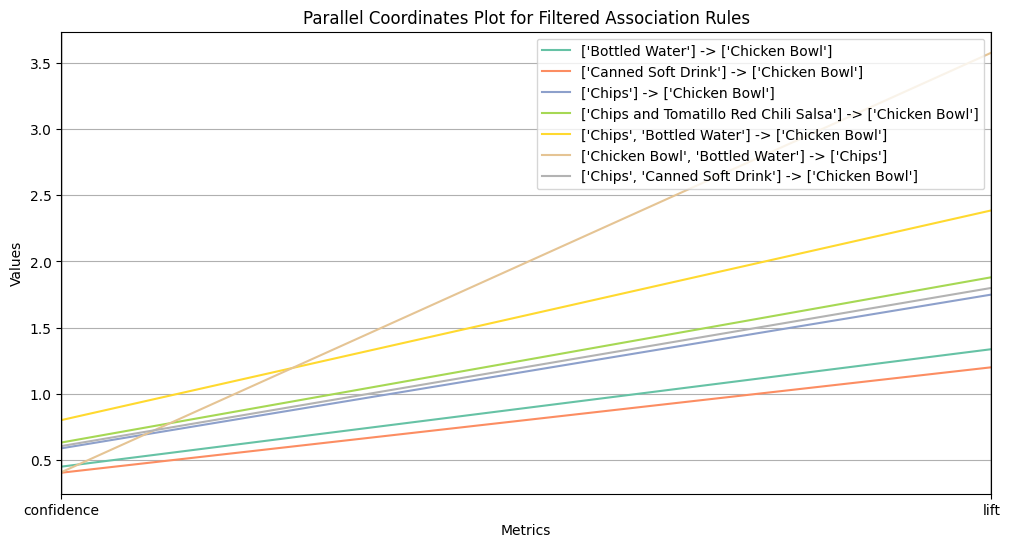

In [101]:
from pandas.plotting import parallel_coordinates

# 필터링을 위한 임계값 설정
confidence_threshold = 0.4
lift_threshold = 1.1

# 높은 신뢰도와 향상도를 가진 규칙만 선택
filtered_rules = rules[(rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]

# 규칙의 이름을 기준으로 평행 좌표 플롯 생성
filtered_rules['rule'] = filtered_rules['antecedents'].apply(lambda x: str(list(x))) + ' -> ' + filtered_rules['consequents'].apply(lambda x: str(list(x)))

# 평행 좌표 플롯 그리기
plt.figure(figsize=(12, 6))
parallel_coordinates(filtered_rules[['confidence', 'lift', 'rule']], class_column='rule', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot for Filtered Association Rules')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

In [92]:
# 상위 규칙을 lift 기준으로 정렬하고, 주요 컬럼만 선택
rules_sorted = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

# 규칙을 잘 보기 위해 항목 집합을 문자열로 변환
rules_sorted['antecedents'] = rules_sorted['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_sorted['consequents'] = rules_sorted['consequents'].apply(lambda x: ', '.join(list(x)))

# 상위 10개의 규칙만 표시
top_10_rules = rules_sorted.head(10)

# 표 형태로 출력
top_10_rules


,antecedents,consequents,support,confidence,lift
39,Chips,"Chicken Bowl, Bottled Water",0.015267,0.134615,3.578038
38,"Chicken Bowl, Bottled Water",Chips,0.015267,0.405797,3.578038
44,"Chicken Bowl, Canned Soft Drink",Chips,0.019084,0.315315,2.780232
45,Chips,"Chicken Bowl, Canned Soft Drink",0.019084,0.168269,2.780232
36,"Chips, Chicken Bowl",Bottled Water,0.015267,0.229508,2.733234
41,Bottled Water,"Chips, Chicken Bowl",0.015267,0.181818,2.733234
37,"Chips, Bottled Water",Chicken Bowl,0.015267,0.800000,2.385691
40,Chicken Bowl,"Chips, Bottled Water",0.015267,0.045528,2.385691
10,Steak Burrito,Canned Soda,0.019629,0.105263,2.053751
11,Canned Soda,Steak Burrito,0.019629,0.382979,2.053751


In [ ]:
ㅠ